In [36]:

# AI vs Data Team Analysis - Merged Sheets Approach
# Analysis of differences between AI and Data Team columns across ALL 8 sheets combined

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 11

print("📊 AI vs Data Team Analysis - MERGED SHEETS APPROACH")
print("=" * 60)
print("🔄 This analysis will combine all 8 sheets into one dataset")
print("   and perform unified analysis on the merged data")
print("=" * 60)
# Load Excel file and examine all sheets
excel_file_path = r"D:\AI_Data_Extractor\analysis\AI Program test TOTAL.xlsx"

try:
    # Read all sheets from the Excel file
    excel_data = pd.read_excel(excel_file_path, sheet_name=None)
    
    print(f"✅ Successfully loaded Excel file: {excel_file_path}")
    print(f"📋 Number of sheets found: {len(excel_data)}")
    print("\n🗂️ Sheet names and basic info:")
    
    sheet_summary = []
    for i, (sheet_name, df) in enumerate(excel_data.items(), 1):
        rows, cols = df.shape
        print(f"  {i}. '{sheet_name}' - {rows} rows, {cols} columns")
        sheet_summary.append({
            'sheet_name': sheet_name,
            'rows': rows,
            'cols': cols,
            'columns': list(df.columns)
        })
    
    print(f"\n📊 Total data points across all sheets: {sum(s['rows'] for s in sheet_summary):,} rows")
        
except FileNotFoundError:
    print(f"❌ File not found: {excel_file_path}")
    print("💡 Please check if the file path is correct")
except Exception as e:
    print(f"❌ Error loading file: {e}")



# Merge all valid sheets into one combined dataset
print("\n🔄 MERGING ALL SHEETS INTO ONE DATASET")
print("=" * 50)

if 'all_sheets_info' in locals() and all_sheets_info:
    
    merged_data_list = []
    merge_summary = []
    
    for sheet_name, info in all_sheets_info.items():
        if info['valid']:
            df = info['dataframe'].copy()
            ai_col = info['ai_col']
            data_team_col = info['data_team_col']
            uni_col = info['uni_col']
            
            # Select only the required columns
            df_selected = df[[uni_col, ai_col, data_team_col]].copy()
            
            # Standardize column names
            df_selected.columns = ['University', 'AI', 'Data_Team']
            
            # Add sheet identifier
            df_selected['Source_Sheet'] = sheet_name
            
            # Clean data - remove missing values
            original_rows = len(df_selected)
            df_selected = df_selected.dropna()
            
            # Ensure numeric columns
            df_selected['AI'] = pd.to_numeric(df_selected['AI'], errors='coerce')
            df_selected['Data_Team'] = pd.to_numeric(df_selected['Data_Team'], errors='coerce')
            
            # Remove rows where conversion failed
            df_selected = df_selected.dropna()
            final_rows = len(df_selected)
            
            print(f"📄 Sheet '{sheet_name}': {original_rows} → {final_rows} rows (cleaned)")
            
            merge_summary.append({
                'sheet': sheet_name,
                'original_rows': original_rows,
                'final_rows': final_rows,
                'dropped_rows': original_rows - final_rows
            })
            
            merged_data_list.append(df_selected)
    
    # Combine all sheets into one dataframe
    if merged_data_list:
        merged_df = pd.concat(merged_data_list, ignore_index=True)
        
        print(f"\n✅ MERGE COMPLETE!")
        print(f"📊 Combined dataset shape: {merged_df.shape}")
        print(f"🏫 Total universities: {merged_df['University'].nunique()}")
        print(f"📋 Total data entries: {len(merged_df)}")
        print(f"🗂️ Data from {len(merged_data_list)} sheets")
        
        # Show summary of merged data
        print(f"\n📈 Merge Summary:")
        total_original = sum(s['original_rows'] for s in merge_summary)
        total_final = sum(s['final_rows'] for s in merge_summary)
        total_dropped = sum(s['dropped_rows'] for s in merge_summary)
        
        print(f"   Original total rows: {total_original}")
        print(f"   Final total rows: {total_final}")
        print(f"   Dropped rows: {total_dropped} ({total_dropped/total_original*100:.1f}%)")
        
        # Display first few rows
        print(f"\n👀 First 5 rows of merged dataset:")
        print(merged_df.head().to_string(index=False))
        
    else:
        print("❌ No valid data to merge")
        
else:
    print("❌ Sheet info not available. Please run the previous cell first.")


📊 AI vs Data Team Analysis - MERGED SHEETS APPROACH
🔄 This analysis will combine all 8 sheets into one dataset
   and perform unified analysis on the merged data
✅ Successfully loaded Excel file: D:\AI_Data_Extractor\analysis\AI Program test TOTAL.xlsx
📋 Number of sheets found: 8

🗂️ Sheet names and basic info:
  1. '1' - 23 rows, 3 columns
  2. '2' - 31 rows, 3 columns
  3. '3' - 23 rows, 3 columns
  4. '4' - 31 rows, 3 columns
  5. '5' - 30 rows, 3 columns
  6. '6' - 31 rows, 3 columns
  7. '7' - 31 rows, 3 columns
  8. '8' - 29 rows, 3 columns

📊 Total data points across all sheets: 229 rows

🔄 MERGING ALL SHEETS INTO ONE DATASET
📄 Sheet '1': 23 → 23 rows (cleaned)
📄 Sheet '2': 31 → 30 rows (cleaned)
📄 Sheet '3': 23 → 23 rows (cleaned)
📄 Sheet '4': 31 → 31 rows (cleaned)
📄 Sheet '5': 30 → 30 rows (cleaned)
📄 Sheet '6': 31 → 31 rows (cleaned)
📄 Sheet '7': 31 → 31 rows (cleaned)
📄 Sheet '8': 29 → 29 rows (cleaned)

✅ MERGE COMPLETE!
📊 Combined dataset shape: (228, 4)
🏫 Total universit

In [37]:

# Analyze the merged dataset
print("\n📊 ANALYZING MERGED DATASET")
print("=" * 50)

if 'merged_df' in locals() and not merged_df.empty:
    
    # Calculate differences and metrics
    merged_df['Difference'] = merged_df['Data_Team'] - merged_df['AI']
    merged_df['Absolute_Difference'] = abs(merged_df['Difference'])
    
    # Calculate percentage difference (handling divide by zero)
    def safe_percent_diff(row):
        if row['AI'] == 0:
            return 0.0
        else:
            return ((row['Data_Team'] - row['AI']) / row['AI'] * 100)
    
    merged_df['Percent_Difference'] = merged_df.apply(safe_percent_diff, axis=1).round(2)
    
    # Overall statistics
    total_ai = int(merged_df['AI'].sum())
    total_data_team = int(merged_df['Data_Team'].sum())
    overall_difference = int(merged_df['Difference'].sum())
    
    print(f"🔢 OVERALL STATISTICS:")
    print(f"   Total AI Programs: {total_ai:,}")
    print(f"   Total Data Team Programs: {total_data_team:,}")
    print(f"   Overall Difference: {overall_difference:,} ({overall_difference:+,})")
    
    if total_ai > 0:
        overall_percent = (overall_difference / total_ai * 100)
        print(f"   Overall Percentage Difference: {overall_percent:+.2f}%")
    
    # Distribution analysis
    print(f"\n📈 DISTRIBUTION ANALYSIS:")
    data_team_higher = (merged_df['Difference'] > 0).sum()
    ai_higher = (merged_df['Difference'] < 0).sum()
    equal = (merged_df['Difference'] == 0).sum()
    total_entries = len(merged_df)
    
    print(f"   Entries where Data Team > AI: {data_team_higher} ({data_team_higher/total_entries*100:.1f}%)")
    print(f"   Entries where AI > Data Team: {ai_higher} ({ai_higher/total_entries*100:.1f}%)")
    print(f"   Entries where AI = Data Team: {equal} ({equal/total_entries*100:.1f}%)")
    
    # Statistical measures
    print(f"\n📐 STATISTICAL MEASURES:")
    print(f"   Mean difference: {merged_df['Difference'].mean():.2f}")
    print(f"   Median difference: {merged_df['Difference'].median():.2f}")
    print(f"   Standard deviation: {merged_df['Difference'].std():.2f}")
    print(f"   Range: {merged_df['Difference'].min():.0f} to {merged_df['Difference'].max():.0f}")
    
    # Correlation analysis
    correlation = merged_df['AI'].corr(merged_df['Data_Team'])
    print(f"\n🤝 CORRELATION ANALYSIS:")
    print(f"   Correlation coefficient: {correlation:.3f}")
    
    if correlation > 0.8:
        agreement_level = "Strong"
    elif correlation > 0.6:
        agreement_level = "Moderate"
    elif correlation > 0.4:
        agreement_level = "Weak"
    else:
        agreement_level = "Very Weak"
    
    print(f"   Agreement level: {agreement_level}")
    
    # Sheet contribution analysis
    print(f"\n📊 BY SOURCE SHEET ANALYSIS:")
    try:
        sheet_analysis = merged_df.groupby('Source_Sheet').agg({
            'AI': 'sum',
            'Data_Team': 'sum',
            'Difference': ['sum', 'mean', 'count']
        }).round(2)
        
        sheet_analysis.columns = ['AI_Total', 'DataTeam_Total', 'Diff_Total', 'Diff_Mean', 'Count']
        
        # Safe percentage calculation for sheet analysis
        sheet_analysis['Percent_Diff'] = sheet_analysis.apply(
            lambda row: ((row['DataTeam_Total'] - row['AI_Total']) / row['AI_Total'] * 100) if row['AI_Total'] > 0 else 0,
            axis=1
        ).round(2)
        
        print(sheet_analysis.to_string())
        
    except Exception as e:
        print(f"   Error in sheet analysis: {e}")
        # Show simpler analysis
        simple_sheet = merged_df.groupby('Source_Sheet')[['AI', 'Data_Team', 'Difference']].sum()
        print(simple_sheet.to_string())
    
else:
    print("❌ Merged dataset not available. Please run the previous cell first.")
    
    
# Calculate the requested categories
less_than_20 = merged_df[(merged_df['Percent_Difference'] > -20) & (merged_df['Percent_Difference'] < 20)]
more_than_50 = merged_df[(merged_df['Percent_Difference'] > 50) | (merged_df['Percent_Difference'] < -50)]
more_than_80 = merged_df[(merged_df['Percent_Difference'] > 80) | (merged_df['Percent_Difference'] < -80)]
between_20_50 = merged_df[((merged_df['Percent_Difference'] >= 20) & (merged_df['Percent_Difference'] <= 50)) | 
                          ((merged_df['Percent_Difference'] <= -20) & (merged_df['Percent_Difference'] >= -50))]

# Print results
print("\n📋 RESULTS FOR YOUR QUERIES:")
print("1. Universities with difference less than 20% (either + or -):")
print(f"   Number: {len(less_than_20)}")
print(f"   Universities: {less_than_20['University'].tolist()}")
print("\n2. Universities with difference between 20% and 50%:")
print(f"   Number: {len(between_20_50)}")
print(f"   Universities: {between_20_50['University'].tolist()}")
print("\n3. Universities with difference more than 50%:")
print(f"   Number: {len(more_than_50)}")
print(f"   Universities: {more_than_50['University'].tolist()}")
print("\n4. Universities with difference more than 80%:")
print(f"   Number: {len(more_than_80)}")
print(f"   Universities: {more_than_80['University'].tolist()}")


# Calculate percentage difference (assuming it's already calculated as per previous code)
def safe_percent_diff(row):
    if row['AI'] == 0:
        return 0.0
    else:
        return ((row['Data_Team'] - row['AI']) / row['AI'] * 100)

merged_df['Percent_Difference'] = merged_df.apply(safe_percent_diff, axis=1).round(2)

# Calculate the requested categories
less_than_20 = merged_df[(merged_df['Percent_Difference'] > -20) & (merged_df['Percent_Difference'] < 20)]
more_than_50 = merged_df[(merged_df['Percent_Difference'] > 50) | (merged_df['Percent_Difference'] < -50)]
more_than_80 = merged_df[(merged_df['Percent_Difference'] > 80) | (merged_df['Percent_Difference'] < -80)]
between_20_50 = merged_df[((merged_df['Percent_Difference'] >= 20) & (merged_df['Percent_Difference'] <= 50)) | 
                          ((merged_df['Percent_Difference'] <= -20) & (merged_df['Percent_Difference'] >= -50))]

# Split each category into AI > Data_Team and Data_Team > AI
less_than_20_ai_greater = less_than_20[less_than_20['Percent_Difference'] < 0]
less_than_20_data_greater = less_than_20[less_than_20['Percent_Difference'] > 0]
between_20_50_ai_greater = between_20_50[between_20_50['Percent_Difference'] < 0]
between_20_50_data_greater = between_20_50[between_20_50['Percent_Difference'] > 0]
more_than_50_ai_greater = more_than_50[more_than_50['Percent_Difference'] < 0]
more_than_50_data_greater = more_than_50[more_than_50['Percent_Difference'] > 0]
more_than_80_ai_greater = more_than_80[more_than_80['Percent_Difference'] < 0]
more_than_80_data_greater = more_than_80[more_than_80['Percent_Difference'] > 0]

# Print results
print("\n📋 RESULTS FOR YOUR QUERIES:")
print("1. Universities with difference less than 20% (either + or -):")
print(f"   Number (AI > Data_Team): {len(less_than_20_ai_greater)}")
print(f"   Universities (AI > Data_Team): {less_than_20_ai_greater['University'].tolist()}")
print(f"   Number (Data_Team > AI): {len(less_than_20_data_greater)}")
print(f"   Universities (Data_Team > AI): {less_than_20_data_greater['University'].tolist()}")
print("\n2. Universities with difference between 20% and 50%:")
print(f"   Number (AI > Data_Team): {len(between_20_50_ai_greater)}")
print(f"   Universities (AI > Data_Team): {between_20_50_ai_greater['University'].tolist()}")
print(f"   Number (Data_Team > AI): {len(between_20_50_data_greater)}")
print(f"   Universities (Data_Team > AI): {between_20_50_data_greater['University'].tolist()}")
# Print results for more than 50%
print("\n📋 RESULTS FOR UNIVERSITIES WITH DIFFERENCE MORE THAN 50%:")
print(f"   Number of Universities: {len(more_than_50)}")
for index, row in more_than_50.iterrows():
    diff = row['Data_Team'] - row['AI']
    print(f"   University: {row['University']}, AI: {row['AI']}, Data_Team: {row['Data_Team']}, Difference: {diff:.2f}, Percent_Difference: {row['Percent_Difference']:.2f}%")

# Print results for more than 80%
print("\n📋 RESULTS FOR UNIVERSITIES WITH DIFFERENCE MORE THAN 80%:")
print(f"   Number of Universities: {len(more_than_80)}")
for index, row in more_than_80.iterrows():
    diff = row['Data_Team'] - row['AI']
    print(f"   University: {row['University']}, AI: {row['AI']}, Data_Team: {row['Data_Team']}, Difference: {diff:.2f}, Percent_Difference: {row['Percent_Difference']:.2f}%")




📊 ANALYZING MERGED DATASET
🔢 OVERALL STATISTICS:
   Total AI Programs: 15,186
   Total Data Team Programs: 27,219
   Overall Difference: 12,033 (+12,033)
   Overall Percentage Difference: +79.24%

📈 DISTRIBUTION ANALYSIS:
   Entries where Data Team > AI: 136 (59.6%)
   Entries where AI > Data Team: 67 (29.4%)
   Entries where AI = Data Team: 25 (11.0%)

📐 STATISTICAL MEASURES:
   Mean difference: 52.78
   Median difference: 7.50
   Standard deviation: 140.41
   Range: -167 to 1249

🤝 CORRELATION ANALYSIS:
   Correlation coefficient: 0.462
   Agreement level: Weak

📊 BY SOURCE SHEET ANALYSIS:
              AI_Total  DataTeam_Total  Diff_Total  Diff_Mean  Count  Percent_Diff
Source_Sheet                                                                      
1                 1275          2477.0      1202.0      52.26     23         94.27
2                 1503          1614.0       111.0       3.70     30          7.39
3                 2099          3795.0      1696.0      73.74     23


📊 CREATING VISUALIZATIONS FOR MERGED DATA


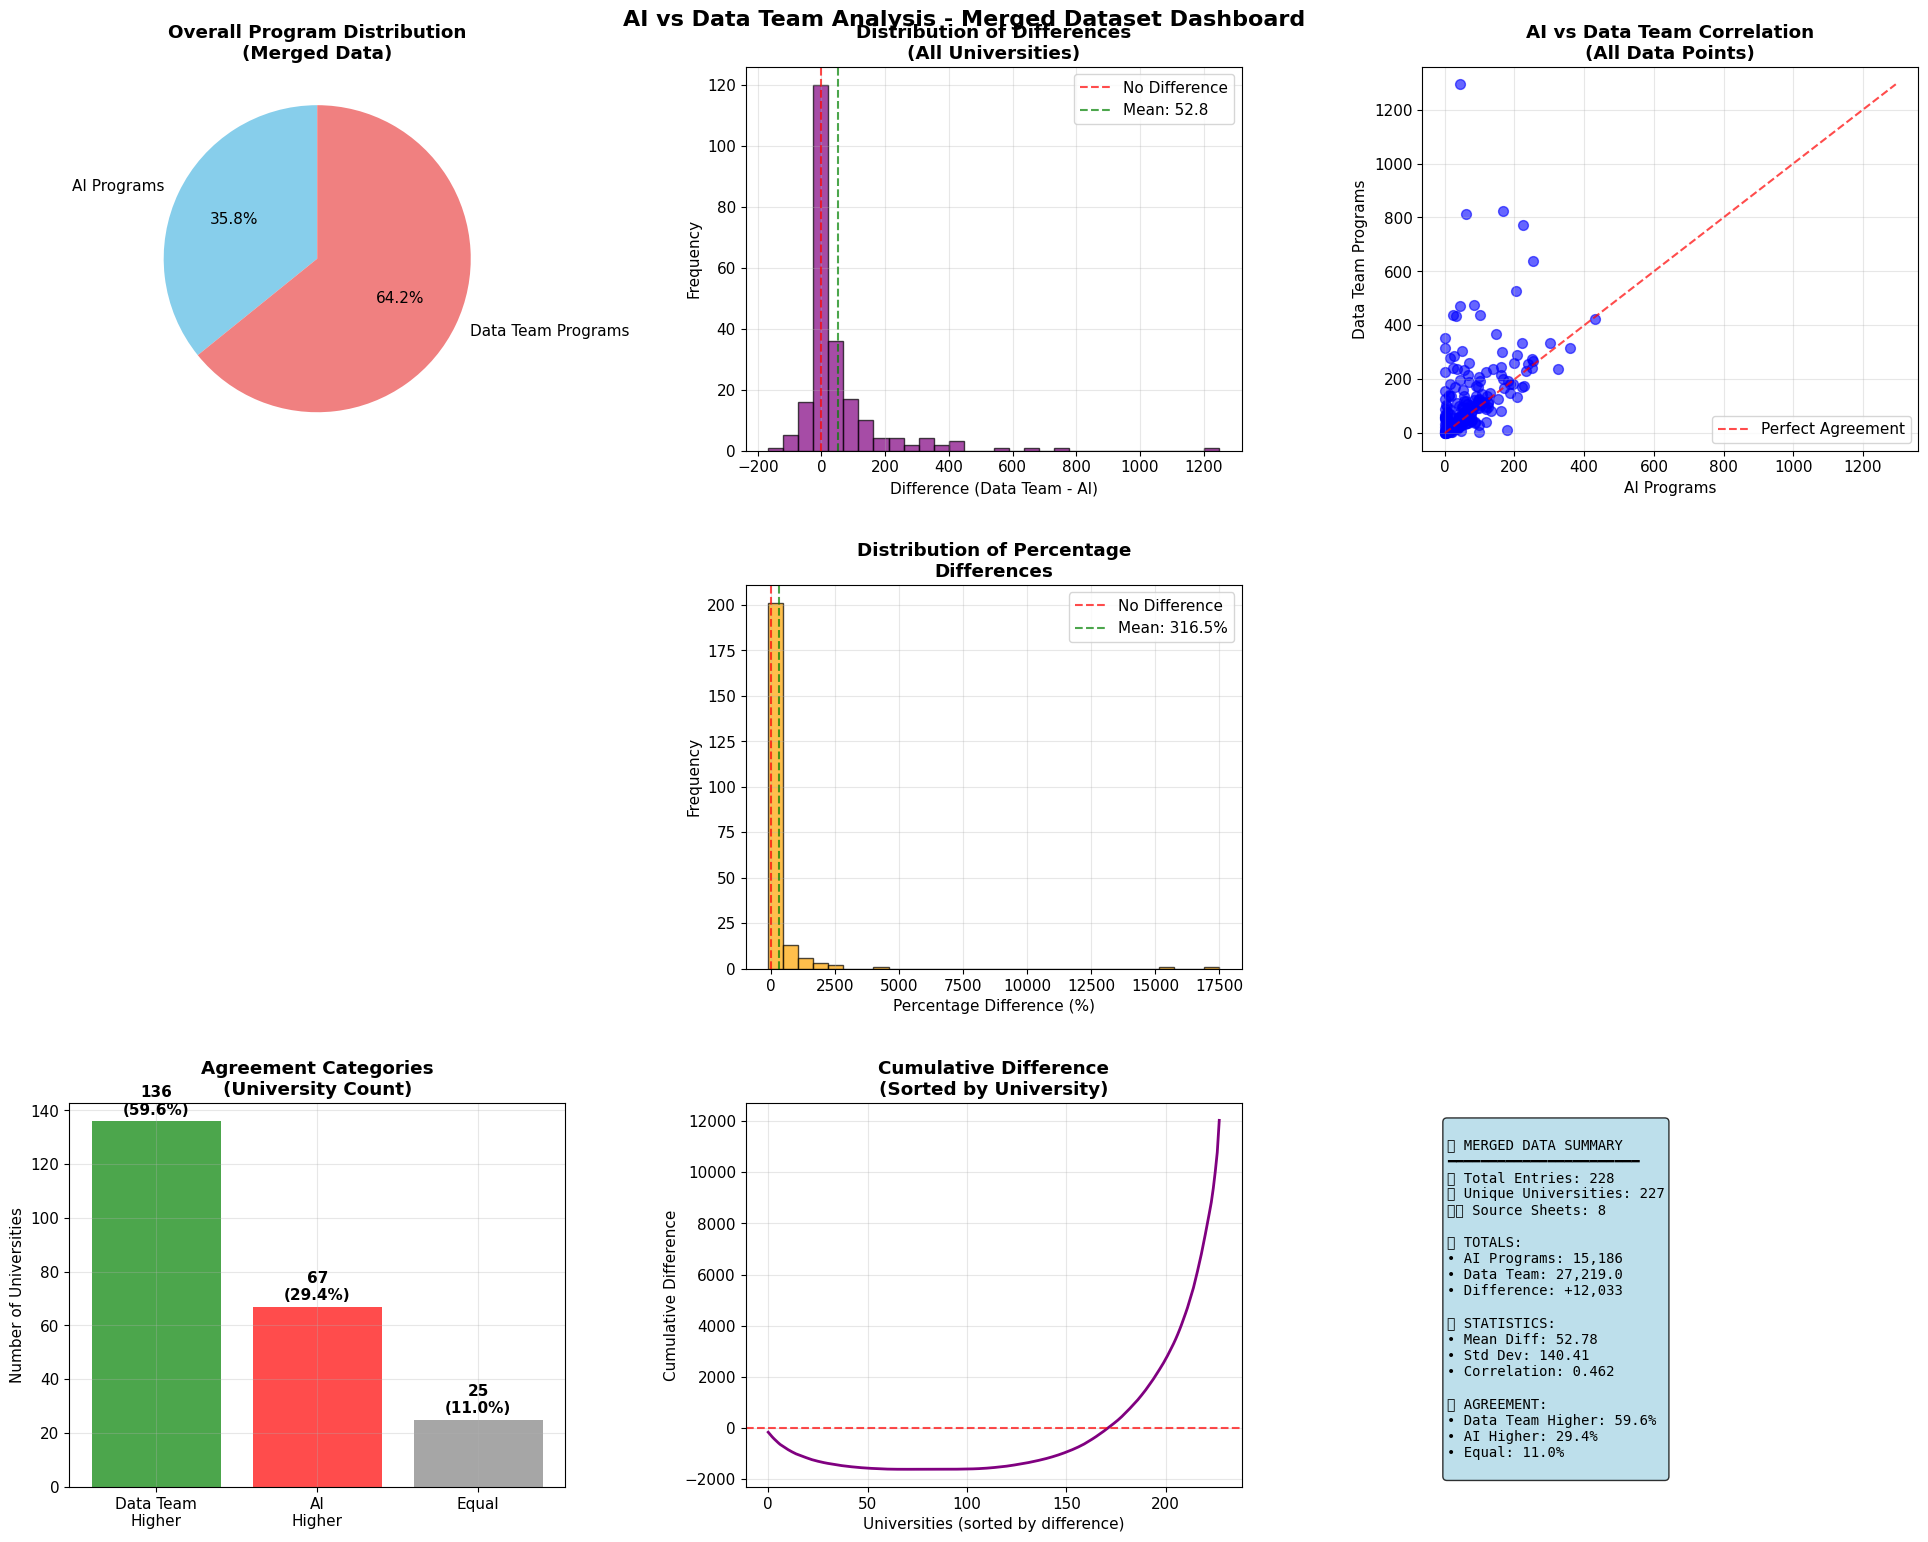

✅ Comprehensive visualization dashboard created!


In [33]:
# Create comprehensive visualizations for merged data
print("\n📊 CREATING VISUALIZATIONS FOR MERGED DATA")
print("=" * 50)

if 'merged_df' in locals() and not merged_df.empty:
    
    # Create a comprehensive dashboard
    fig = plt.figure(figsize=(20, 16))
    
    # 1. Overall comparison pie chart
    ax1 = plt.subplot(3, 3, 1)
    total_ai = merged_df['AI'].sum()
    total_data_team = merged_df['Data_Team'].sum()
    
    sizes = [total_ai, total_data_team]
    labels = ['AI Programs', 'Data Team Programs']
    colors = ['skyblue', 'lightcoral']
    
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.title('Overall Program Distribution\n(Merged Data)', fontweight='bold')
    
    # 2. Difference histogram
    ax2 = plt.subplot(3, 3, 2)
    plt.hist(merged_df['Difference'], bins=30, alpha=0.7, color='purple', edgecolor='black')
    plt.axvline(x=0, color='red', linestyle='--', alpha=0.7, label='No Difference')
    plt.axvline(x=merged_df['Difference'].mean(), color='green', linestyle='--', alpha=0.7, 
                label=f'Mean: {merged_df["Difference"].mean():.1f}')
    plt.xlabel('Difference (Data Team - AI)')
    plt.ylabel('Frequency')
    plt.title('Distribution of Differences\n(All Universities)', fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 3. AI vs Data Team scatter plot
    ax3 = plt.subplot(3, 3, 3)
    plt.scatter(merged_df['AI'], merged_df['Data_Team'], alpha=0.6, color='blue', s=50)
    max_val = max(merged_df['AI'].max(), merged_df['Data_Team'].max())
    plt.plot([0, max_val], [0, max_val], 'r--', alpha=0.7, label='Perfect Agreement')
    plt.xlabel('AI Programs')
    plt.ylabel('Data Team Programs')
    plt.title('AI vs Data Team Correlation\n(All Data Points)', fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    

    
    # 5. Percentage difference distribution
    ax5 = plt.subplot(3, 3, 5)
    plt.hist(merged_df['Percent_Difference'], bins=30, alpha=0.7, color='orange', edgecolor='black')
    plt.axvline(x=0, color='red', linestyle='--', alpha=0.7, label='No Difference')
    plt.axvline(x=merged_df['Percent_Difference'].mean(), color='green', linestyle='--', alpha=0.7,
                label=f'Mean: {merged_df["Percent_Difference"].mean():.1f}%')
    plt.xlabel('Percentage Difference (%)')
    plt.ylabel('Frequency')
    plt.title('Distribution of Percentage\nDifferences', fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    

    
    # 7. Agreement categories
    ax7 = plt.subplot(3, 3, 7)
    data_team_higher = (merged_df['Difference'] > 0).sum()
    ai_higher = (merged_df['Difference'] < 0).sum()
    equal = (merged_df['Difference'] == 0).sum()
    
    categories = ['Data Team\nHigher', 'AI\nHigher', 'Equal']
    values = [data_team_higher, ai_higher, equal]
    colors = ['green', 'red', 'gray']
    
    bars = plt.bar(categories, values, color=colors, alpha=0.7)
    plt.ylabel('Number of Universities')
    plt.title('Agreement Categories\n(University Count)', fontweight='bold')
    
    # Add value labels on bars
    for bar, value in zip(bars, values):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + max(values)*0.01,
                f'{value}\n({value/len(merged_df)*100:.1f}%)', 
                ha='center', va='bottom', fontweight='bold')
    plt.grid(True, alpha=0.3)
    
    # 8. Cumulative difference
    ax8 = plt.subplot(3, 3, 8)
    merged_df_sorted = merged_df.sort_values('Difference')
    cumulative_diff = merged_df_sorted['Difference'].cumsum()
    
    plt.plot(range(len(cumulative_diff)), cumulative_diff, linewidth=2, color='purple')
    plt.axhline(y=0, color='red', linestyle='--', alpha=0.7)
    plt.xlabel('Universities (sorted by difference)')
    plt.ylabel('Cumulative Difference')
    plt.title('Cumulative Difference\n(Sorted by University)', fontweight='bold')
    plt.grid(True, alpha=0.3)
    
    # 9. Top differences summary
    ax9 = plt.subplot(3, 3, 9)
    ax9.axis('off')
    
    # Summary statistics text
    summary_text = f"""
📊 MERGED DATA SUMMARY
━━━━━━━━━━━━━━━━━━━━━━━
📋 Total Entries: {len(merged_df):,}
🏫 Unique Universities: {merged_df['University'].nunique():,}
🗂️ Source Sheets: {merged_df['Source_Sheet'].nunique()}

🔢 TOTALS:
• AI Programs: {total_ai:,}
• Data Team: {total_data_team:,}
• Difference: {overall_difference:+,}

📈 STATISTICS:
• Mean Diff: {merged_df['Difference'].mean():.2f}
• Std Dev: {merged_df['Difference'].std():.2f}
• Correlation: {merged_df['AI'].corr(merged_df['Data_Team']):.3f}

🎯 AGREEMENT:
• Data Team Higher: {data_team_higher/len(merged_df)*100:.1f}%
• AI Higher: {ai_higher/len(merged_df)*100:.1f}%
• Equal: {equal/len(merged_df)*100:.1f}%
"""
    
    plt.text(0.05, 0.95, summary_text, transform=ax9.transAxes, fontsize=10,
             verticalalignment='top', fontfamily='monospace',
             bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
    
    plt.tight_layout(pad=3.0)
    plt.suptitle('AI vs Data Team Analysis - Merged Dataset Dashboard', 
                 fontsize=16, fontweight='bold', y=0.98)
    plt.show()
    
    print("✅ Comprehensive visualization dashboard created!")
    
else:
    print("❌ No merged data available for visualization")


In [19]:
# Detailed insights and top discrepancies
print("\n🔍 DETAILED INSIGHTS & TOP DISCREPANCIES")
print("=" * 60)

if 'merged_df' in locals() and not merged_df.empty:
    
    # Top discrepancies analysis
    print("\n🎯 TOP DISCREPANCIES (Universities with Largest Differences):")
    print("=" * 60)
    
    # Top 10 where Data Team found more than AI
    print("\n🔝 TOP 10 - Data Team Higher than AI:")
    print("-" * 50)
    top_positive = merged_df.nlargest(10, 'Difference')
    
    for idx, (_, row) in enumerate(top_positive.iterrows(), 1):
        print(f"{idx:2d}. {row['University'][:35]:35} | Sheet: {row['Source_Sheet']:8} | "
              f"AI: {row['AI']:3} → Data Team: {row['Data_Team']:3} | "
              f"Diff: +{row['Difference']:3} ({row['Percent_Difference']:+6.1f}%)")
    
    # Top 10 where AI found more than Data Team
    print("\n🔻 TOP 10 - AI Higher than Data Team:")
    print("-" * 50)
    top_negative = merged_df.nsmallest(10, 'Difference')
    
    for idx, (_, row) in enumerate(top_negative.iterrows(), 1):
        print(f"{idx:2d}. {row['University'][:35]:35} | Sheet: {row['Source_Sheet']:8} | "
              f"AI: {row['AI']:3} → Data Team: {row['Data_Team']:3} | "
              f"Diff: {row['Difference']:3} ({row['Percent_Difference']:+6.1f}%)")
    
    # University-level aggregation (if same university appears in multiple sheets)
    print(f"\n🏫 UNIVERSITY-LEVEL AGGREGATION:")
    print("-" * 50)
    
    uni_aggregation = merged_df.groupby('University').agg({
        'AI': 'sum',
        'Data_Team': 'sum',
        'Source_Sheet': 'count'  # Count how many sheets this university appears in
    }).reset_index()
    
    uni_aggregation['Total_Difference'] = uni_aggregation['Data_Team'] - uni_aggregation['AI']
    uni_aggregation['Appears_In_Sheets'] = uni_aggregation['Source_Sheet']
    uni_aggregation = uni_aggregation.drop('Source_Sheet', axis=1)
    
    # Universities appearing in multiple sheets
    multi_sheet_unis = uni_aggregation[uni_aggregation['Appears_In_Sheets'] > 1]
    
    if not multi_sheet_unis.empty:
        print(f"Universities appearing in multiple sheets: {len(multi_sheet_unis)}")
        print("Top 5 universities by total programs (across all sheets):")
        top_total_programs = uni_aggregation.nlargest(5, 'Data_Team')
        for idx, (_, row) in enumerate(top_total_programs.iterrows(), 1):
            print(f"  {idx}. {row['University'][:40]:40} | "
                  f"Total Data Team: {row['Data_Team']:4} | Total AI: {row['AI']:4} | "
                  f"Sheets: {row['Appears_In_Sheets']}")
    else:
        print("All universities appear in only one sheet each.")
    
    # Sheet-level insights
    print(f"\n📊 SHEET-LEVEL INSIGHTS:")
    print("-" * 50)
    
    sheet_summary = merged_df.groupby('Source_Sheet').agg({
        'AI': ['sum', 'mean', 'std'],
        'Data_Team': ['sum', 'mean', 'std'],
        'Difference': ['sum', 'mean', 'std', 'min', 'max'],
        'University': 'count'
    }).round(2)
    
    # Flatten column names
    sheet_summary.columns = ['_'.join(col).strip() for col in sheet_summary.columns]
    
    # Find most/least consistent sheets
    most_consistent_sheet = sheet_summary['Difference_std'].idxmin()
    least_consistent_sheet = sheet_summary['Difference_std'].idxmax()
    
    # Sheet with largest positive/negative bias
    most_positive_sheet = sheet_summary['Difference_sum'].idxmax()
    most_negative_sheet = sheet_summary['Difference_sum'].idxmin()
    
    print(f"Most consistent sheet (lowest variance): {most_consistent_sheet}")
    print(f"Least consistent sheet (highest variance): {least_consistent_sheet}")
    print(f"Sheet favoring Data Team most: {most_positive_sheet} (+{sheet_summary.loc[most_positive_sheet, 'Difference_sum']})")
    print(f"Sheet favoring AI most: {most_negative_sheet} ({sheet_summary.loc[most_negative_sheet, 'Difference_sum']})")
    
    # Key insights and recommendations
    print(f"\n💡 KEY INSIGHTS & RECOMMENDATIONS:")
    print("=" * 60)
    
    total_ai = merged_df['AI'].sum()
    total_data_team = merged_df['Data_Team'].sum()
    overall_diff = total_data_team - total_ai
    correlation = merged_df['AI'].corr(merged_df['Data_Team'])
    
    print(f"\n✅ MAIN FINDINGS:")
    
    if overall_diff > 0:
        print(f"   • Data Team identified {overall_diff:,} more programs overall than AI")
        print(f"   • This represents a {abs(overall_diff)/total_ai*100:.1f}% difference")
    elif overall_diff < 0:
        print(f"   • AI identified {abs(overall_diff):,} more programs overall than Data Team")
        print(f"   • This represents a {abs(overall_diff)/total_ai*100:.1f}% difference")
    else:
        print(f"   • Both methods identified exactly the same total number of programs")
    
    # Agreement level assessment
    if correlation > 0.8:
        print(f"   • Strong correlation ({correlation:.3f}) indicates good overall agreement")
    elif correlation > 0.6:
        print(f"   • Moderate correlation ({correlation:.3f}) suggests reasonable agreement")
    else:
        print(f"   • Low correlation ({correlation:.3f}) indicates significant methodological differences")
    
    # Consistency analysis
    data_team_higher_pct = (merged_df['Difference'] > 0).sum() / len(merged_df) * 100
    
    if data_team_higher_pct > 60:
        print(f"   • Data Team consistently finds more programs ({data_team_higher_pct:.1f}% of cases)")
    elif data_team_higher_pct < 40:
        print(f"   • AI consistently finds more programs ({100-data_team_higher_pct:.1f}% of cases)")
    else:
        print(f"   • Methods show balanced performance (Data Team higher in {data_team_higher_pct:.1f}% of cases)")
    
    print(f"\n🎯 RECOMMENDATIONS:")
    print(f"   1. Investigate universities with largest discrepancies for methodology validation")
    print(f"   2. Focus on sheet '{least_consistent_sheet}' which shows highest variance")
    print(f"   3. Consider hybrid approach combining both methods")
    print(f"   4. Manual verification recommended for top 20 discrepancies")
    print(f"   5. Standardize data collection methodology across all sheets")
    
    print(f"\n✅ MERGED ANALYSIS COMPLETE!")
    print("=" * 60)
    print(f"📊 Analyzed {len(merged_df):,} entries from {merged_df['Source_Sheet'].nunique()} sheets")
    print(f"🏫 Covering {merged_df['University'].nunique():,} unique universities")
    print(f"🔍 Total programs: AI={total_ai:,}, Data Team={total_data_team:,}")
    
else:
    print("❌ No merged data available for detailed analysis")



🔍 DETAILED INSIGHTS & TOP DISCREPANCIES

🎯 TOP DISCREPANCIES (Universities with Largest Differences):

🔝 TOP 10 - Data Team Higher than AI:
--------------------------------------------------
 1. Selcuk University                   | Sheet: 7        | AI:  45 → Data Team: 1294.0 | Diff: +1249.0 (+2775.6%)
 2. University of Hertfordshire         | Sheet: 4        | AI:  61 → Data Team: 813.0 | Diff: +752.0 (+1232.8%)
 3. Tokat Gaziosmanpaşa University      | Sheet: 4        | AI: 168 → Data Team: 824.0 | Diff: +656.0 (+390.5%)
 4. Pamukkale                           | Sheet: 6        | AI: 225 → Data Team: 772.0 | Diff: +547.0 (+243.1%)
 5. erciyes_edu_tr                      | Sheet: 3        | AI:  44 → Data Team: 471.0 | Diff: +427.0 (+970.5%)
 6. uludag_edu_tr                       | Sheet: 8        | AI:  23 → Data Team: 440.0 | Diff: +417.0 (+1813.0%)
 7. dicle_edu_tr                        | Sheet: 3        | AI:  31 → Data Team: 434.0 | Diff: +403.0 (+1300.0%)
 8. Regent        

In [12]:
# Detailed insights and findings
print("\n🔍 DETAILED INSIGHTS & FINDINGS")
print("=" * 60)

if cleaned_data and analysis_summary:
    
    # Find universities with largest discrepancies
    print("\n🎯 TOP DISCREPANCIES BY UNIVERSITY:")
    print("-" * 45)
    
    # Get top 10 largest positive and negative differences
    top_positive = combined_df.nlargest(5, 'Difference')
    top_negative = combined_df.nsmallest(5, 'Difference')
    
    print("🔝 TOP 5 - Data Team Higher than AI:")
    for idx, row in top_positive.iterrows():
        uni_col = None
        for sheet_name, sheet_data in cleaned_data.items():
            if sheet_name == row['Sheet']:
                uni_col = sheet_data['uni_col']
                break
        
        uni_name = row[uni_col] if uni_col else "Unknown"
        ai_col = None
        data_team_col = None
        for sheet_name, sheet_data in cleaned_data.items():
            if sheet_name == row['Sheet']:
                ai_col = sheet_data['ai_col']
                data_team_col = sheet_data['data_team_col']
                break
        
        print(f"   {uni_name[:30]:30} | {row['Sheet'][:15]:15} | AI: {row[ai_col]:3} → Data Team: {row[data_team_col]:3} | Diff: +{row['Difference']}")
    
    print("\n🔻 TOP 5 - AI Higher than Data Team:")
    for idx, row in top_negative.iterrows():
        uni_col = None
        for sheet_name, sheet_data in cleaned_data.items():
            if sheet_name == row['Sheet']:
                uni_col = sheet_data['uni_col']
                break
        
        uni_name = row[uni_col] if uni_col else "Unknown"
        ai_col = None
        data_team_col = None
        for sheet_name, sheet_data in cleaned_data.items():
            if sheet_name == row['Sheet']:
                ai_col = sheet_data['ai_col']
                data_team_col = sheet_data['data_team_col']
                break
        
        print(f"   {uni_name[:30]:30} | {row['Sheet'][:15]:15} | AI: {row[ai_col]:3} → Data Team: {row[data_team_col]:3} | Diff: {row['Difference']}")
    
    # Statistical analysis
    print(f"\n📊 STATISTICAL SUMMARY:")
    print("-" * 45)
    
    total_entries = len(combined_df)
    data_team_higher = (combined_df['Difference'] > 0).sum()
    ai_higher = (combined_df['Difference'] < 0).sum()
    equal = (combined_df['Difference'] == 0).sum()
    
    print(f"📈 Entries where Data Team > AI: {data_team_higher} ({data_team_higher/total_entries*100:.1f}%)")
    print(f"📉 Entries where AI > Data Team: {ai_higher} ({ai_higher/total_entries*100:.1f}%)")
    print(f"⚖️ Entries where AI = Data Team: {equal} ({equal/total_entries*100:.1f}%)")
    
    print(f"\n📐 Difference Statistics:")
    print(f"   Mean difference: {combined_df['Difference'].mean():.2f}")
    print(f"   Median difference: {combined_df['Difference'].median():.2f}")
    print(f"   Standard deviation: {combined_df['Difference'].std():.2f}")
    print(f"   Range: {combined_df['Difference'].min()} to {combined_df['Difference'].max()}")
    
    # Agreement analysis
    correlation = np.corrcoef(ai_values, data_team_values)[0, 1]
    print(f"\n🤝 AGREEMENT ANALYSIS:")
    print("-" * 45)
    print(f"📊 Correlation coefficient: {correlation:.3f}")
    
    if correlation > 0.8:
        agreement_level = "Strong"
    elif correlation > 0.6:
        agreement_level = "Moderate"
    elif correlation > 0.4:
        agreement_level = "Weak"
    else:
        agreement_level = "Very Weak"
    
    print(f"🎯 Agreement level: {agreement_level}")
    
    # Recommendations
    print(f"\n💡 KEY INSIGHTS & RECOMMENDATIONS:")
    print("-" * 45)
    
    if overall_difference > 0:
        print(f"✅ Overall, Data Team identified {overall_difference} more programs than AI")
    elif overall_difference < 0:
        print(f"✅ Overall, AI identified {abs(overall_difference)} more programs than Data Team")
    else:
        print(f"✅ Overall totals are exactly equal between AI and Data Team")
    
    if correlation > 0.7:
        print("✅ Strong correlation suggests both methods are generally consistent")
    else:
        print("⚠️ Lower correlation suggests significant methodological differences")
    
    # Sheet-specific insights
    most_consistent_sheet = summary_df.loc[summary_df['std_difference'].idxmin(), 'sheet']
    least_consistent_sheet = summary_df.loc[summary_df['std_difference'].idxmax(), 'sheet']
    
    print(f"📊 Most consistent sheet: {most_consistent_sheet}")
    print(f"📊 Least consistent sheet: {least_consistent_sheet}")
    
    print(f"\n🔍 NEXT STEPS:")
    print("-" * 45)
    print("1. Investigate universities with largest discrepancies")
    print("2. Review methodology for sheets with high variance")
    print("3. Consider hybrid approach combining both methods")
    print("4. Validate findings with manual checks for outliers")
    
else:
    print("❌ No data available for detailed analysis")

print(f"\n✅ ANALYSIS COMPLETE!")
print("=" * 60)



🔍 DETAILED INSIGHTS & FINDINGS

🎯 TOP DISCREPANCIES BY UNIVERSITY:
---------------------------------------------
🔝 TOP 5 - Data Team Higher than AI:
   Selcuk University              | 7               | AI:  45 → Data Team: 1294.0 | Diff: +1249.0
   University of Hertfordshire    | 4               | AI:  61 → Data Team: 813.0 | Diff: +752.0
   Tokat Gaziosmanpaşa University | 4               | AI: 168 → Data Team: 824.0 | Diff: +656.0
   Pamukkale                      | 6               | AI: 225 → Data Team: 772.0 | Diff: +547.0
   erciyes_edu_tr                 | 3               | AI:  44 → Data Team: 471.0 | Diff: +427.0

🔻 TOP 5 - AI Higher than Data Team:
   The International University o | 2               | AI: 180 → Data Team: 13.0 | Diff: -167.0
   yalova_edu_tr                  | 8               | AI:  98 → Data Team: 5.0 | Diff: -93.0
   Quinnipiac                     | 6               | AI: 326 → Data Team: 237.0 | Diff: -89.0
   umary_edu                      | 8           